# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

#### Question 1 Answer

In [1]:
# Write the code for your answer here. You can use multiple cells to improve readability.
#1a Download 
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
from torchvision.transforms import ToPILImage #for visualization 
import matplotlib.pyplot as plt
show=ToPILImage()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) ## normalization

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5,
                                          shuffle=True, num_workers=2) #Batch size samples are extracted from the database each time

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=5,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(trainset)
print(testset)


Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [2]:
#Add random noise 
MystudentID=1718689
torch.manual_seed(MystudentID)
scale=0.5

X_train = trainset.data
noise_train_set = X_train +scale* torch.randn(X_train.shape).numpy()
#normalise/standardise the pixel values to the original range
noise_train_set=np.clip(noise_train_set,0,255)/255


X_test = testset.data
noise_test_set = X_test +scale* torch.randn(X_test.shape).numpy()
noise_test_set=np.clip(noise_test_set,0,255)/255 #normalise/standardise the pixel values to the original range


In [9]:
trainset[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

dog


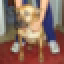

In [4]:
#Extract a subset with only two classes: Cat and Dog and name it starting with CatDog
def find_Catdog(dataset,noise_dataset,datype):
  # no noise catdog
    catdog=[] 
  # noise catdog
    catdog_noise=[]
    if datype=="train":
        for i in range(0,50000):
            if(dataset[i][1]==3 or dataset[i][1]==5 ): # cat--3  dog--5
                catdog.append(dataset[i])
                catdog_noise.append(noise_dataset[i])
    if datype=="test":
        for i in range(0,10000):
            if(dataset[i][1]==3 or dataset[i][1]==5 ): # cat--3  dog--5
                catdog.append(dataset[i])
                catdog_noise.append(noise_dataset[i])
    return catdog,catdog_noise

    
(catdog_train,catdog_train_noise) =find_Catdog(trainset,noise_train_set,'train')  

(catdog_test,catdog_test_noise)=find_Catdog(testset,noise_test_set,'test')  

#show one of catdog_train
x=random.randint(0,30)
(data,label)=catdog_train[x]
print(classes[label])
show((data+1)/2).resize((64,64))


  cat--original


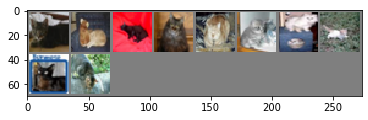

  cat--noise


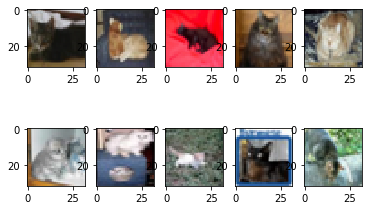

  dog--original


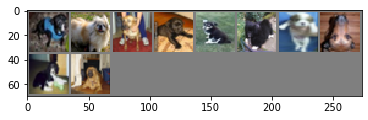

  dog--noise


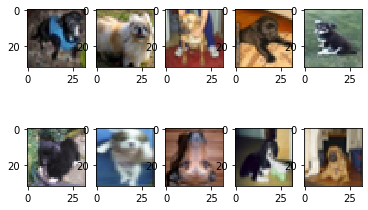

In [5]:
#Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize back to range [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #rearrange dimensions to numpy format for disply
    plt.show()
    
    
def imshow_noise(img):
    plt.imshow(np.transpose(img, (0, 1, 2))) #rearrange dimensions to numpy format for disply
    

#show 10 pair of cats
cat=[]
imagess=[]
cat_noi=[]
imagess_noise=[]
for i in range(0,len(catdog_train)):
    if(catdog_train[i][1]==3):
        cat.append(catdog_train[i])  #cat set without noise
        cat_noi.append(catdog_train_noise[i])#cat set with noise      
        
for x in range(0,10):
    (data,label)=cat[x]
    imagess.append(data)
    imagess_noise.append(cat_noi[x])
print(' ','cat--original')
imshow(torchvision.utils.make_grid(imagess))#PLOT CAT-ORIGINAL

for x in range(0,10):
    plt.subplot(2,5,x+1)
    imshow_noise(imagess_noise[x])
    if x==9:
        print(' ','cat--noise')
        plt.show()  #PLOT CAT-NOISE


#show 10 pair of dogs
dog=[]
dog_noi=[]
imagess=[]
imagess_noise=[]
for i in range(0,len(catdog_train)):
    if(catdog_train[i][1]==5):
        dog.append(catdog_train[i])
        dog_noi.append(catdog_train_noise[i])
for x in range(0,10):
    (data,label)=dog[x]
    imagess.append(data)
    imagess_noise.append(dog_noi[x])
print(' ','dog--original')
imshow(torchvision.utils.make_grid(imagess))

for x in range(0,10):
    plt.subplot(2,5,x+1)
    imshow_noise(imagess_noise[x])
    if x==9:
        print(' ','dog--noise')
        plt.show()


### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [6]:
# Write the code for your answer here. You can use multiple cells to improve readability.
#2a
from sklearn.decomposition import PCA

#use pca to reduce dimension
def dimenReduc(data,featureCount):
    pca = PCA(n_components=featureCount)
    pca.fit(data) 
    newData = pca.transform(data)
   
    return newData

data_train=list()#get 3D data
label_train=list()#get labe

for item in catdog_train:
    data_train.append(item[0].numpy())
    label_train.append(item[1])
#print(data_train)

#reshape 3D to 2D
data_train=np.array(data_train).reshape(len(data_train),-1)
'''
(newdata1,k1)=seven_feature(data_train,0.90)
(newdata2,k2)=seven_feature(data_train,0.92)
(newdata3,k3)=seven_feature(data_train,0.94)
(newdata4,k4)=seven_feature(data_train,0.95)
(newdata5,k5)=seven_feature(data_train,0.96)
(newdata6,k6)=seven_feature(data_train,0.98)
(newdata7,k7)=seven_feature(data_train,0.99)---561
'''
newdata1=dimenReduc(data_train,80)
newdata2=dimenReduc(data_train,100)
newdata3=dimenReduc(data_train,150)
newdata4=dimenReduc(data_train,200)
newdata5=dimenReduc(data_train,350)
newdata6=dimenReduc(data_train,400)
newdata7=dimenReduc(data_train,561)




In [7]:
#2b
from sklearn.naive_bayes import GaussianNB
model_or=GaussianNB()
model_or.fit(data_train,label_train)#original features (raw pixels)

model1 = GaussianNB()
model1.fit(newdata1,label_train)#k1

model2 = GaussianNB()
model2.fit(newdata2,label_train)#k2

model3 = GaussianNB()
model3.fit(newdata3,label_train)#k3

model4 = GaussianNB()
model4.fit(newdata4,label_train)#k4

model5= GaussianNB()
model5.fit(newdata5,label_train)#k5

model6 = GaussianNB()
model6.fit(newdata6,label_train)#k6

model7 = GaussianNB()
model7.fit(newdata7,label_train)#k7


GaussianNB(priors=None, var_smoothing=1e-09)

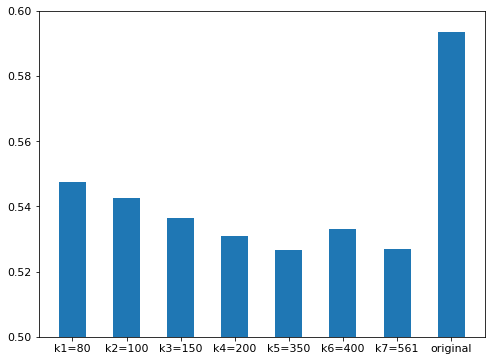

In [8]:

#2c
#print(len(catdog_test))  
from sklearn.metrics import accuracy_score


data_test=list()#get 3D data
label_test=list()#get label
for item in catdog_test:
    data_test.append(item[0].numpy())
    label_test.append(item[1])  
        
data_test=np.array(data_test).reshape(len(data_test),-1)


#Processing test set
test=list()
test.append(dimenReduc(data_test,80))
test.append(dimenReduc(data_test,100))
test.append(dimenReduc(data_test,150))
test.append(dimenReduc(data_test,200))
test.append(dimenReduc(data_test,350))
test.append(dimenReduc(data_test,400))
test.append(dimenReduc(data_test,561))



pred_or=model_or.predict(data_test) #predict use  original features--model
pre_accuracy0=accuracy_score(pred_or,label_test) #get accuracy about prediction

pred=list()
pre_accuracy=list()
pre_prob=list()

pred.append(model1.predict(test[0]))
pre_accuracy.append(accuracy_score(pred[0],label_test))#k1
pre_prob.append(model1.predict_proba(test[0]))


pred.append(model2.predict(test[1]))
pre_accuracy.append(accuracy_score(pred[1],label_test))#k2
pre_prob.append(model2.predict_proba(test[1]))

pred.append(model3.predict(test[2]))
pre_accuracy.append(accuracy_score(pred[2],label_test))#k3
pre_prob.append(model3.predict_proba(test[2]))


pred.append(model4.predict(test[3]))
pre_accuracy.append(accuracy_score(pred[3],label_test))#k4
pre_prob.append(model4.predict_proba(test[3]))


pred.append(model5.predict(test[4]))
pre_accuracy.append(accuracy_score(pred[4],label_test))#k5
pre_prob.append(model5.predict_proba(test[4]))


pred.append(model6.predict(test[5]))
pre_accuracy.append(accuracy_score(pred[5],label_test))#k6
pre_prob.append(model6.predict_proba(test[5]))


pred.append(model7.predict(test[6]))
pre_accuracy.append(accuracy_score(pred[6],label_test))#k7
pre_prob.append(model7.predict_proba(test[6]))


pre_accuracy.append(pre_accuracy0)
pre_prob.append(model_or.predict_proba(data_test))# probability--original data-pre_prob[7]

#Plot
x_des=['k1=80','k2=100','k3=150','k4=200','k5=350','k6=400','k7=561','original']
plt.figure(figsize=(8,6))
plt.ylim(0.50,0.60)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.bar(x_des,pre_accuracy,width=0.5)
plt.show()

green line is k1
black line is k2
gray line is k3
purple line is k4
yellow line is k5
pink line is k6
orange line is k7
red line is original


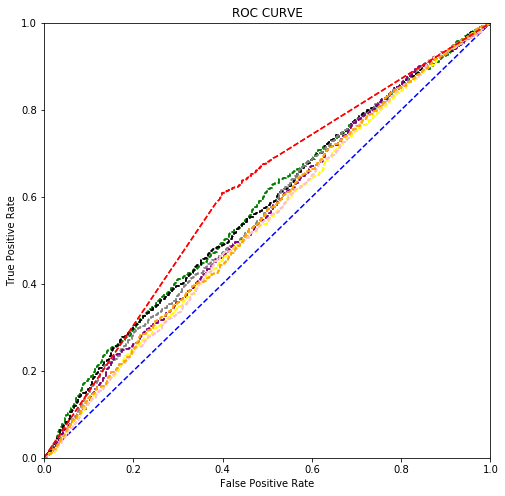

In [9]:
#2dPlot the ROC Curves in true positive rates vs false positive rates for the eight Naive Bayes classifiers in one figure using eight different line/marker styles clearly labelled.
from sklearn import metrics

proba_list=list()
for i in pre_prob:
    proba_list.append(np.around(i[:,1],decimals=8))#get proability
    

true=list()
for i in range(len(label_test)):
    if label_test[i]==5:
        true.append(1)
    else:
        true.append(0)
        
#TPR: the proportion of true positive examples that are predicted to be correct
#FPR: the proportion of real counterexamples that are predicted to be correct
#the sample with a value of 1 is a positive sample(dog).
f_t_value=list()
area=list()
for i in range(8):
    fpr,tpr,thresholds=metrics.roc_curve(true,proba_list[i], pos_label=1)#get TPR and FPR
    f_t_value.append((fpr,tpr))
    auc=metrics.auc(fpr,tpr)
    area.append(auc) #2e
    
#plot ROC Curves
plt.figure(figsize=(8,8))  
plt.plot([0, 1], [0.0, 1.0], color='blue', linestyle='--') 
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0]) 

co=['green','black','gray','purple','yellow','pink','orange','red'] 
for i in range(8):
        plt.plot(f_t_value[i][0],f_t_value[i][1],color=co[i], linestyle='--')#k1
        plt.plot(f_t_value[i][0],f_t_value[i][1],color=co[i], linestyle='--')
print('green line is k1')
print('black line is k2')
print('gray line is k3')
print('purple line is k4')
print('yellow line is k5')
print('pink line is k6')
print('orange line is k7')
print('red line is original')

plt.title('ROC CURVE') 
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate') 
plt.show()  



[0.573567, 0.5692699999999999, 0.5597970000000001, 0.550813, 0.538721, 0.539687, 0.546872, 0.6056835]


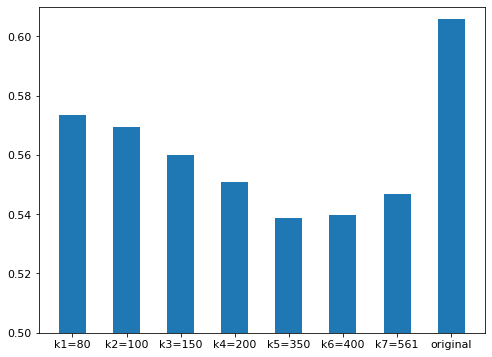

In [10]:
#2e. visualise using a bar graph.
print(area)
#Plot area value
x_des=['k1=80','k2=100','k3=150','k4=200','k5=350','k6=400','k7=561','original']
plt.figure(figsize=(8,6))
plt.ylim(0.50,0.61)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.bar(x_des,area,width=0.5)
plt.show()

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c.  Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

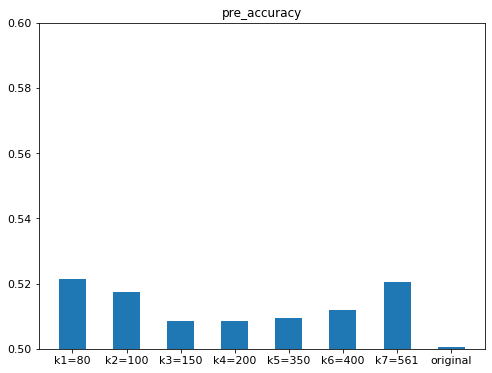

In the 2c,original is highest,when we use noise data,it becomes the lowest 


In [11]:
# Write the code for your answer here. You can use multiple cells to improve readability.
#3a

data_train_noise=catdog_train_noise
    
#reshape 3D to 2D
data_train_noise=np.array(data_train_noise).reshape(len(data_train_noise),-1)

newdata1=dimenReduc(data_train_noise,80)
newdata2=dimenReduc(data_train_noise,100)
newdata3=dimenReduc(data_train_noise,150)
newdata4=dimenReduc(data_train_noise,200)
newdata5=dimenReduc(data_train_noise,350)
newdata6=dimenReduc(data_train_noise,400)
newdata7=dimenReduc(data_train_noise,561)


model_or=GaussianNB()
model_or.fit(data_train_noise,label_train)#original features (raw pixels)

model1 = GaussianNB()
model1.fit(newdata1,label_train)#k1

model2 = GaussianNB()
model2.fit(newdata2,label_train)#k2

model3 = GaussianNB()
model3.fit(newdata3,label_train)#k3

model4 = GaussianNB()
model4.fit(newdata4,label_train)#k4

model5= GaussianNB()
model5.fit(newdata5,label_train)#k5

model6 = GaussianNB()
model6.fit(newdata6,label_train)#k6

model7 = GaussianNB()
model7.fit(newdata7,label_train)#k7

#3a-2c
data_test_noise=catdog_test_noise        
data_test_noise=np.array(data_test).reshape(len(data_test),-1)


#Processing test set
test=list()
test.append(dimenReduc(data_test_noise,80))
test.append(dimenReduc(data_test_noise,100))
test.append(dimenReduc(data_test_noise,150))
test.append(dimenReduc(data_test_noise,200))
test.append(dimenReduc(data_test_noise,350))
test.append(dimenReduc(data_test_noise,400))
test.append(dimenReduc(data_test_noise,561))



pred_or=model_or.predict(data_test_noise) #predict use  original features--model
pre_accuracy0=accuracy_score(pred_or,label_test) #get accuracy about prediction

pred=list()
pre_accuracy=list()

pred.append(model1.predict(test[0]))
pre_accuracy.append(accuracy_score(pred[0],label_test))#k1

pred.append(model2.predict(test[1]))
pre_accuracy.append(accuracy_score(pred[1],label_test))#k2

pred.append(model3.predict(test[2]))
pre_accuracy.append(accuracy_score(pred[2],label_test))#k3

pred.append(model4.predict(test[3]))
pre_accuracy.append(accuracy_score(pred[3],label_test))#k4

pred.append(model5.predict(test[4]))
pre_accuracy.append(accuracy_score(pred[4],label_test))#k5

pred.append(model6.predict(test[5]))
pre_accuracy.append(accuracy_score(pred[5],label_test))#k6

pred.append(model7.predict(test[6]))
pre_accuracy.append(accuracy_score(pred[6],label_test))#k7

pre_accuracy.append(pre_accuracy0)#original

#Plot
x_des=['k1=80','k2=100','k3=150','k4=200','k5=350','k6=400','k7=561','original']
plt.figure(figsize=(8,6))
plt.title('pre_accuracy')
plt.ylim(0.50,0.60)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.bar(x_des,pre_accuracy,width=0.5)
plt.show()

print('In the 2c,original is highest,when we use noise data,it becomes the lowest ')

In [12]:
#3bApply PCA on the training set to reduce the dimensionality. You need to study at least three different values for the reduced dimensionality.
data_train_all=list()#get 3D data
label_train_all=list()#get labe

for item in trainset:
    data_train_all.append(item[0].numpy())
    label_train_all.append(item[1])
#print(data_train)

#reshape 3D to 2D
data_train_all=np.array(data_train_all).reshape(len(data_train_all),-1) 

def dimenReduc_noise(data,featureCount):
    pca = PCA(n_components=featureCount)
    pca.fit(data)
    n=pca.n_components_
    newData = pca.transform(data)   
    return newData,n

newdata=list()
(newdata1,k1)=dimenReduc_noise(data_train_all,0.95)
newdata.append(newdata1)
print(k1)
(newdata2,k2)=dimenReduc_noise(data_train_all,0.97)
newdata.append(newdata2)
print(k2)
(newdata3,k3)=dimenReduc_noise(data_train_all,0.99)
newdata.append(newdata3)
print(k3)


217
335
658


In [13]:
#3c. Train nine classifers
import torch.nn as nn
import torch.nn.functional as F
import time

time_train=list()
#four Naive Bayes classifiers(one on the original features and three on PCA features with three different dimensions in 3b);
start = time.perf_counter()
all_model=list()
for i in range(4):
    if i==0:
        model=GaussianNB()
        model.fit(data_train_all,label_train_all)#original features (raw pixels)
        all_model.append(model)
    else:
        model = GaussianNB()
        model.fit(newdata[i-1],label_train_all)#ki model1--newdata[0]
        all_model.append(model)
end = time.perf_counter()
time_train.append(end-start)
print(time_train)

[2.762241700000004]


In [14]:
#four Logistic Regression classifiers (one on the original features, three on PCA features with three different dimensions in 3b)
from sklearn.linear_model import LogisticRegression
start = time.perf_counter()
for i in range(4,8):
    if i==4:
        clf = LogisticRegression(solver='sag',multi_class='auto')  #clf: classifier
        clf.fit(data_train_all, label_train_all)
        all_model.append(clf)
    else:
        clf = LogisticRegression(solver='sag',multi_class='auto')  #clf: classifier
        clf.fit(newdata[i-5], label_train_all)
        all_model.append(clf)
end = time.perf_counter()        
time_train.append(end-start)
print(time_train)

D:\anac\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[2.762241700000004, 568.9465915000001]


In [15]:
#one Convoluational Neural Network as defined in the pytorch CIFAR10 tutorial.
start = time.perf_counter()
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

#Define a Loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#Train the network
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
end = time.perf_counter()        
time_train.append(end-start)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
[1,  2000] loss: 2.196
[1,  4000] loss: 1.838
[1,  6000] loss: 1.642
[1,  8000] loss: 1.539
[1, 10000] loss: 1.460
[2,  2000] loss: 1.404
[2,  4000] loss: 1.374
[2,  6000] loss: 1.350
[2,  8000] loss: 1.298
[2, 10000] loss: 1.278
Finished Training


In [16]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [29]:
#3d Evalaute the nine classifiers on the test set. Summarise the classification accuracy, total training time, 
#  and total test time using three bar graphs.
data_test_all=list()#get 3D data
label_test_all=list()#get labe

for item in testset:
    data_test_all.append(item[0].numpy())
    label_test_all.append(item[1])
#print(data_train)

#reshape 3D to 2D
data_test_all=np.array(data_test_all).reshape(len(data_test_all),-1) 

#four Naive Bayes classifiers test
test=list()
test.append(dimenReduc(data_test_all,217))
test.append(dimenReduc(data_test_all,335))
test.append(dimenReduc(data_test_all,658))

pred=list()
pre_accuracy=list()

time_test=list()
start = time.perf_counter()
for i in range(4): 
    if i==0:
        pred.append(all_model[i].predict(data_test_all))
        pre_accuracy.append(accuracy_score(pred[i],label_test_all))
        #print(pre_accuracy[0])
    else:
        pred.append(all_model[i].predict(test[i-1]))
        pre_accuracy.append(accuracy_score(pred[i],label_test_all))
end = time.perf_counter()      
time_test.append(end-start)
print(time_test)

0.2976
[6.123902699999917]


In [30]:
#four Logistic Regression classifiers test
start = time.perf_counter()

for i in range(4,8):
    if i==4:
        pred.append(all_model[i].predict(data_test_all))
        pre_accuracy.append(accuracy_score(pred[i],label_test_all))
        #print(pre_accuracy[i])
    else:
        pred.append(all_model[i].predict(test[i-5]))
        pre_accuracy.append(accuracy_score(pred[i],label_test_all))
        
end = time.perf_counter()       
time_test.append(end-start)
print(time_test)

[6.123902699999917, 0.07863819999988664]


In [31]:
#Convoluational Neural Network test
start = time.perf_counter()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

end = time.perf_counter()      
time_test.append(end-start)
print(time_test)

Accuracy of the network on the 10000 test images: 52 %
[6.123902699999917, 0.07863819999988664, 5.741402200000039]


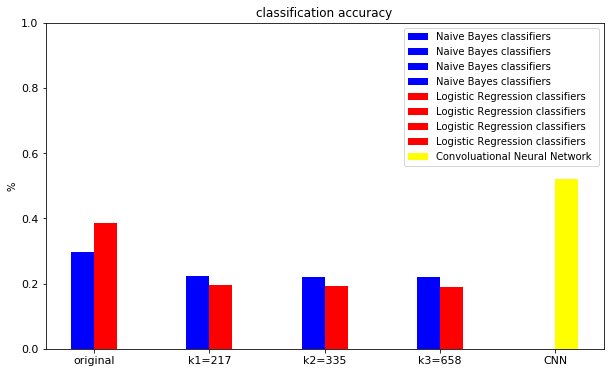

[0.2976, 0.2221, 0.2188, 0.2201, 0.3852, 0.1964, 0.193, 0.1908]


In [120]:
#Plot the classification accuracy
x_des=['original','k1=217','k2=335','k3=658','CNN']
x=np.arange(5)
plt.figure(figsize=(10,6))
plt.title('classification accuracy')
plt.ylim(0.0,1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
bar_width=0.2
for i in range(4):
    plt.bar(x[i],pre_accuracy[i],color='blue',width=bar_width,label='Naive Bayes classifiers')
for i in range(4,8):
    plt.bar(x[i-4]+bar_width,pre_accuracy[i],color='red',width=bar_width,label='Logistic Regression classifiers')
   
    
plt.bar(x[4]+bar_width,0.52,color='yellow',width=bar_width,label='Convoluational Neural Network ')

plt.xticks(x+bar_width/2,x_des)
plt.ylabel('%')
plt.legend()
plt.show()    
print(pre_accuracy)

training time [2.762241700000004, 568.9465915000001, 96.83700799999997]


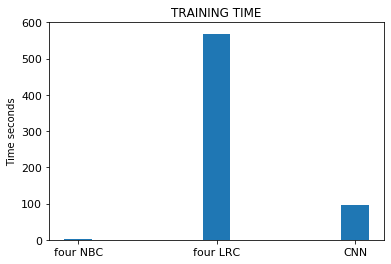

test time [6.123902699999917, 0.07863819999988664, 5.741402200000039]


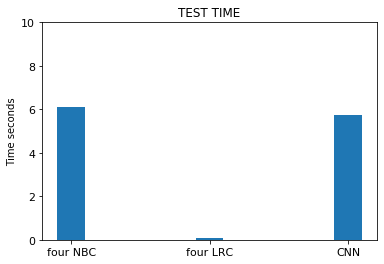

In [48]:
#PLOT training time
print('training time',time_train)
x_des=['four NBC','four LRC','CNN']
plt.title('TRAINING TIME')
plt.ylim(0,600)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Time seconds')
plt.bar(x_des,time_train,width=0.2)
plt.show()


#PLOT test time
print('test time',time_test)
x_des=['four NBC','four LRC','CNN']
plt.title('TEST TIME')
plt.ylim(0,10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Time seconds')
plt.bar(x_des,time_test,width=0.2)
plt.show()

original NBC


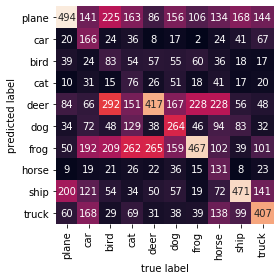

k 1 NBC


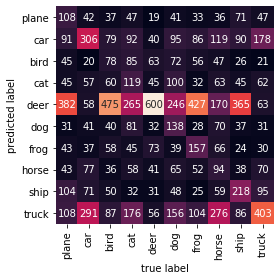

k 2 NBC


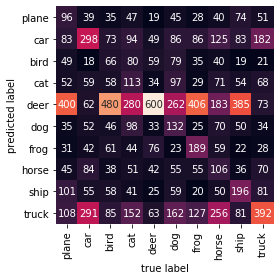

k 3 NBC


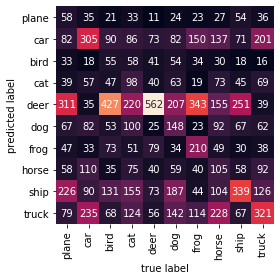

original LRC


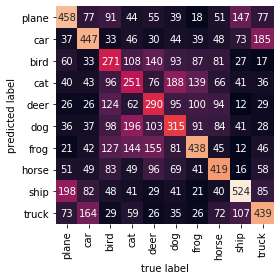

k 1 LRC


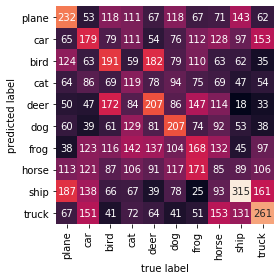

k 2 LRC


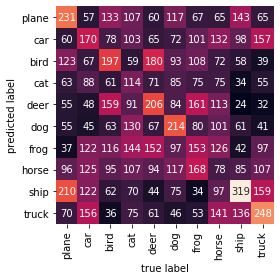

k 3 LRC


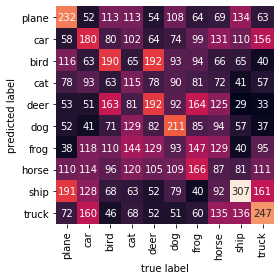

CNN


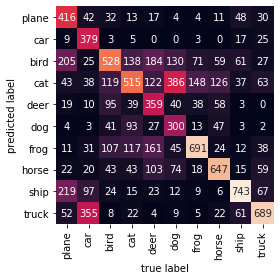

In [87]:
#3eShow the confusion matrix for these nine classifiers (see Lab 8 - 1.4).
from sklearn.metrics import confusion_matrix
import seaborn as sns
#four NB 
for i in range(4):
    mat = confusion_matrix(label_test_all, pred[i]) 
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
    if i==0:
        print('original NBC')
    else:
        print('k',i,'NBC')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
for i in range(4,8):
    mat = confusion_matrix(label_test_all, pred[i]) 
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
    if i==4:
        print('original LRC')
    else:
        print('k',i-4,'LRC')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    
    
#cnn
testloader = torch.utils.data.DataLoader(testset, batch_size=10000,
                                         shuffle=False, num_workers=2)
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

mat = confusion_matrix(labels,predicted) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
print('CNN')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()    


### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [11]:
# Write the code for your answer here. You can use multiple cells to improve readability.
#4aModify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels).
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential( 
            #  3input image channel, 16 output channel, 3x3 square convolution 
            nn.Conv2d(3, 16, 3, stride=2, padding=1), 
            nn.ReLU(),      
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x    

In [12]:
myAE=Autoencoder()
print(myAE)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)


In [38]:
demo = noise_train_set.reshape(50000,(3*32*32))
new_list = list()
for i in range(demo.shape[0]):
    new_list.append(np.reshape(demo[i],(3,32,32)))
new_list = np.array(new_list)
new_list.shape


(50000, 3, 32, 32)

In [39]:
#4bTraining: feed the noisy training images as input to the autoencoder in 4a; 
#use a loss function that computes the reconstruction error between the output of the autoencoder and the respective original images.
batch_size=1
learning_rate=1e-3
max_epochs = 20 
#Choose mean square error loss
criterion = nn.MSELoss()
optimizer =torch.optim.SGD(myAE.parameters(), lr=0.05)

noise_train_loader = torch.utils.data.DataLoader(new_list, batch_size=batch_size, shuffle=True)

#Start training
for epoch in range(max_epochs):
    for data in noise_train_loader: 
        img= data
        optimizer.zero_grad()
        recon = myAE(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()            
    if (epoch % 2) == 0: #每三个输出
        print('Epoch:{}, Loss:{:.4f}'.forma.t(epoch+1, float(loss)))
    outputs.append((epoch, img, recon),)




KeyboardInterrupt: 

In [ ]:
#4cTesting: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images.
#Find the worstly denoised 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).



